In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [7]:
data = pd.read_csv("E:\\Dataset\\tripadvisor_hotel_reviews.csv\\tripadvisor_hotel_reviews.csv")
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [8]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

1. In the dataset 20491 rows and 2 columns
2. There is no missing value

In [11]:
data.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [13]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [12]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


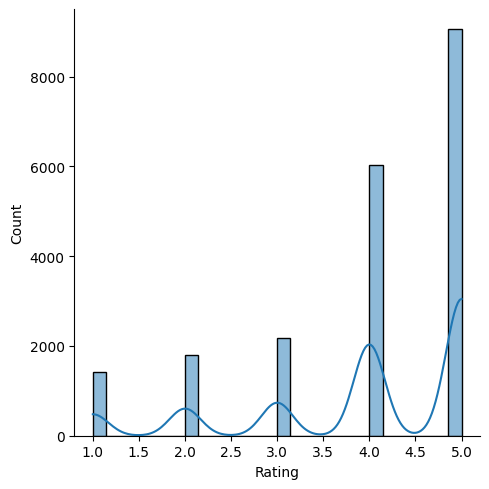

In [18]:
sns.displot(data['Rating'],kde=True)
plt.show()

<AxesSubplot: xlabel='Rating'>

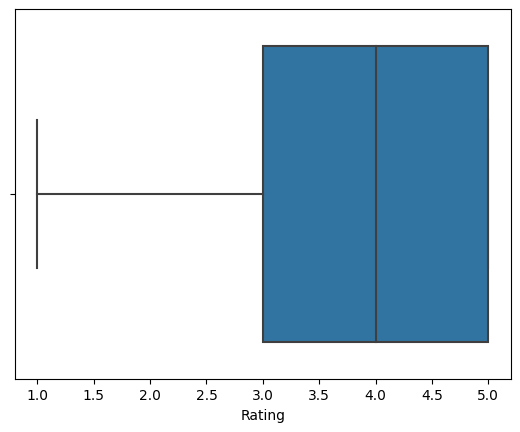

In [19]:
sns.boxplot(x=data['Rating'])

<AxesSubplot: xlabel='Rating', ylabel='count'>

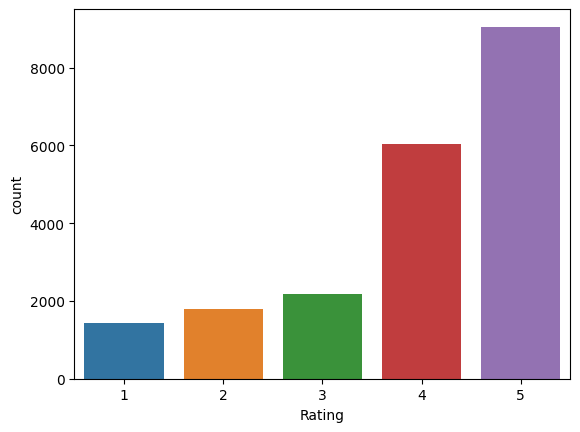

In [21]:
sns.countplot(x=data['Rating'])

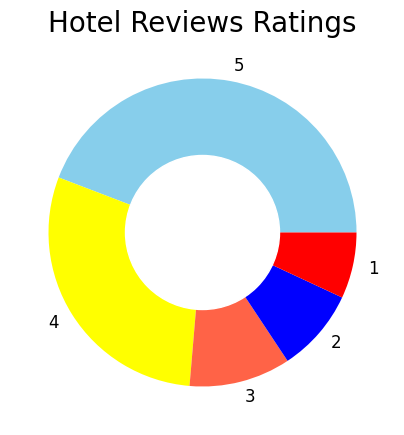

In [29]:
ratings = data['Rating'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue","yellow","tomato","blue","red"]
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0,0),0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

Most of the guests rated the hotel services with 5 stars and 4 stars. We can say that most of the guests are satisfied with the services of the hotel they stayed. 

Now analyzing the sentiments of hotel reviews. To analyze the sentiment of the hotel reviews, I’ll add three additional columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews.

In [31]:
sentiments = SentimentIntensityAnalyzer()

data['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]

data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]

data["Neutral"] =  [sentiments.polarity_scores(i)['neu'] for i in data["Review"]]
data.head()

,Review,Rating,Positive,Negative,Neutral
0,nice hotel expensive parking got good deal sta...,4,0.285,0.072,0.643
1,ok nothing special charge diamond member hilto...,2,0.189,0.110,0.701
2,nice rooms not 4* experience hotel monaco seat...,3,0.219,0.081,0.700
3,"unique, great stay, wonderful time hotel monac...",5,0.385,0.060,0.555
4,"great stay great stay, went seahawk game aweso...",5,0.221,0.135,0.643


In [32]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
        
        
sentiment_score(x,y,z)        

Neutral


Most people feel neutral about the hotel services.

let’s take a closer look at sentiment scores..

In [33]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  6359.91000000002
Negative:  1473.4750000000038
Neutral:  12657.627999999937
